# Using dataset: nutrition.csv

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading data
data = pd.read_csv("nutrition.csv")
data.corr()

,calories,protein,carbohydrates,total_fat,saturated_fat,caffiene,cholesterol,fiber,folic_acid,sodium,...,potassium,riboflavin,selenium,thiamin,vitamin_A,vitamin_B6,vitamin_B12,vitamin_C,vitamin_D,zinc
calories,1.000000,0.314220,0.472698,0.790178,0.621773,0.047808,0.056912,0.227384,0.195128,0.082574,...,0.171336,0.192363,0.158120,0.252106,-0.063877,0.157406,-0.005828,-0.059178,0.046291,0.177878
protein,0.314220,1.000000,-0.290374,0.059530,0.038819,-0.003590,0.293823,-0.068940,-0.046685,0.002444,...,0.244279,0.162523,0.377741,0.088072,-0.038869,0.207915,0.253327,-0.068450,0.032740,0.407075
carbohydrates,0.472698,-0.290374,1.000000,-0.049598,-0.049924,0.070576,-0.224605,0.462811,0.383877,0.059178,...,0.122499,0.232903,-0.084202,0.267766,0.016734,0.209477,-0.090053,0.094342,0.010882,-0.008453
total_fat,0.790178,0.059530,-0.049598,1.000000,0.769576,-0.013215,0.094080,-0.032857,-0.056301,0.012055,...,-0.047807,-0.044859,0.037534,-0.013205,-0.016512,-0.055787,-0.017033,-0.057490,0.113910,0.026650
saturated_fat,0.621773,0.038819,-0.049924,0.769576,1.000000,-0.004598,0.090744,-0.085740,-0.053817,-0.003612,...,-0.064854,-0.040500,0.004692,-0.049515,-0.023925,-0.076659,-0.006865,-0.043977,0.080454,0.018184
caffiene,0.047808,-0.003590,0.070576,-0.013215,-0.004598,1.000000,-0.016817,0.022401,-0.007861,-0.006945,...,0.286682,0.012617,-0.012298,-0.015081,-0.008550,-0.011942,-0.013976,-0.004417,-0.010667,-0.013117
cholesterol,0.056912,0.293823,-0.224605,0.094080,0.090744,-0.016817,1.000000,-0.151950,-0.064840,-0.017006,...,-0.011382,0.093601,0.196312,-0.047241,0.081948,0.018592,0.314852,-0.030188,0.133008,0.111285
fiber,0.227384,-0.068940,0.462811,-0.032857,-0.085740,0.022401,-0.151950,1.000000,0.185892,-0.003920,...,0.339193,0.136073,-0.025343,0.192353,0.140653,0.232353,-0.056758,0.074669,-0.030354,0.092520
folic_acid,0.195128,-0.046685,0.383877,-0.056301,-0.053817,-0.007861,-0.064840,0.185892,1.000000,0.044152,...,0.000863,0.565402,0.015571,0.589231,0.041486,0.594800,0.144742,0.051550,0.084830,0.339030
sodium,0.082574,0.002444,0.059178,0.012055,-0.003612,-0.006945,-0.017006,-0.003920,0.044152,1.000000,...,-0.000116,0.046033,0.014796,0.064696,-0.004287,-0.001799,-0.006743,-0.016473,0.007602,-0.022526


In [4]:
len(data) # Length

8463

In [5]:
data.shape # Checking shape

(8463, 28)

In [6]:
data.head() # Viewing data

,food,calories,protein,carbohydrates,total_fat,saturated_fat,caffiene,cholesterol,fiber,folic_acid,...,riboflavin,selenium,thiamin,vitamin_A,vitamin_B6,vitamin_B12,vitamin_C,vitamin_D,zinc,group
0,"Butter, salted",717.0,0.85,0.06,81.11,51.368,0.0,215.0,0.0,0.0,...,0.034,1.0,0.005,2499.0,0.003,0.17,0.0,60.0,0.09,Dairy and Egg Products
1,"Butter, whipped, with salt",717.0,0.85,0.06,81.11,50.489,0.0,219.0,0.0,0.0,...,0.034,1.0,0.005,2499.0,0.003,0.13,0.0,60.0,0.05,Dairy and Egg Products
2,"Butter oil, anhydrous",876.0,0.28,0.00,99.48,61.924,0.0,256.0,0.0,0.0,...,0.005,0.0,0.001,3069.0,0.001,0.01,0.0,73.0,0.01,Dairy and Egg Products
3,"Cheese, blue",353.0,21.40,2.34,28.74,18.669,0.0,75.0,0.0,0.0,...,0.382,14.5,0.029,721.0,0.166,1.22,0.0,21.0,2.66,Dairy and Egg Products
4,"Cheese, brick",371.0,23.24,2.79,29.68,18.764,0.0,94.0,0.0,0.0,...,0.351,14.5,0.014,1080.0,0.065,1.26,0.0,22.0,2.60,Dairy and Egg Products


- **Problem: ** Our goal is to find the calories of a particular food product from the given data.<br>
- **Approach: ** Clearly this is a regression type problem. 

In [7]:
data.food.unique()

array(['Butter, salted', 'Butter, whipped, with salt',
       'Butter oil, anhydrous', ..., 'Syrup, cane',
       'Mollusks, snail, raw', 'Turtle, green, raw'], dtype=object)

In [8]:
len(data.food.unique())

8462

In [9]:
data.food[0:50]

0                                        Butter, salted
1                            Butter, whipped, with salt
2                                 Butter oil, anhydrous
3                                          Cheese, blue
4                                         Cheese, brick
5                                          Cheese, brie
6                                     Cheese, camembert
7                                       Cheese, caraway
8                                       Cheese, cheddar
9                                      Cheese, cheshire
10                                        Cheese, colby
11        Cheese, cottage, creamed, large or small curd
12                 Cheese, cottage, creamed, with fruit
13    Cheese, cottage, nonfat, uncreamed, dry, large...
14                  Cheese, cottage, lowfat, 2% milkfat
15                  Cheese, cottage, lowfat, 1% milkfat
16                                        Cheese, cream
17                                         Chees

In [10]:
data.columns

Index(['food', 'calories', 'protein', 'carbohydrates', 'total_fat',
       'saturated_fat', 'caffiene', 'cholesterol', 'fiber', 'folic_acid',
       'sodium', 'calcium', 'iron', 'magnesium', 'manganese', 'niacin',
       'phosphorus', 'potassium', 'riboflavin', 'selenium', 'thiamin',
       'vitamin_A', 'vitamin_B6', 'vitamin_B12', 'vitamin_C', 'vitamin_D',
       'zinc', 'group'],
      dtype='object')

In [11]:
data.group

0                  Dairy and Egg Products
1                  Dairy and Egg Products
2                  Dairy and Egg Products
3                  Dairy and Egg Products
4                  Dairy and Egg Products
5                  Dairy and Egg Products
6                  Dairy and Egg Products
7                  Dairy and Egg Products
8                  Dairy and Egg Products
9                  Dairy and Egg Products
10                 Dairy and Egg Products
11                 Dairy and Egg Products
12                 Dairy and Egg Products
13                 Dairy and Egg Products
14                 Dairy and Egg Products
15                 Dairy and Egg Products
16                 Dairy and Egg Products
17                 Dairy and Egg Products
18                 Dairy and Egg Products
19                 Dairy and Egg Products
20                 Dairy and Egg Products
21                 Dairy and Egg Products
22                 Dairy and Egg Products
23                 Dairy and Egg P

- Seeing the data, we will consider only the important features for predicting the calories.<br>
- These features are taken because an average human is familiar of all these features.

In [12]:
data.columns

Index(['food', 'calories', 'protein', 'carbohydrates', 'total_fat',
       'saturated_fat', 'caffiene', 'cholesterol', 'fiber', 'folic_acid',
       'sodium', 'calcium', 'iron', 'magnesium', 'manganese', 'niacin',
       'phosphorus', 'potassium', 'riboflavin', 'selenium', 'thiamin',
       'vitamin_A', 'vitamin_B6', 'vitamin_B12', 'vitamin_C', 'vitamin_D',
       'zinc', 'group'],
      dtype='object')

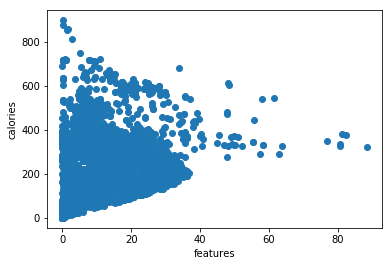

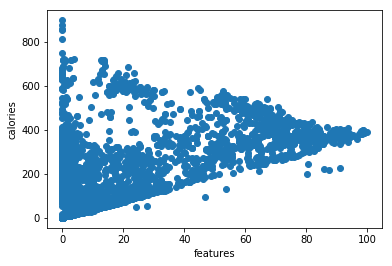

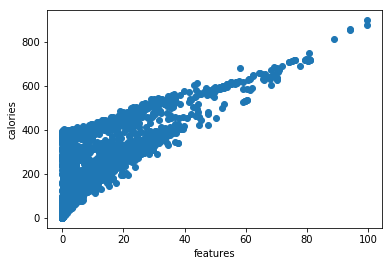

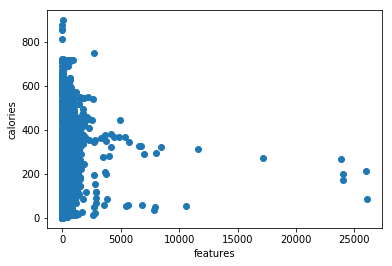

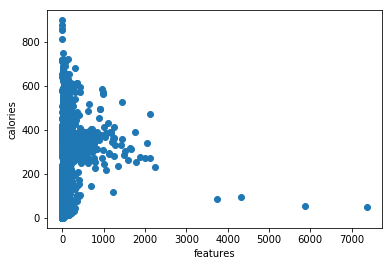

In [13]:
# Let us check if there is a linear relationship between any of the columns and the labels.
y = data.calories.values
x = [data.protein.values, data.carbohydrates.values, data.total_fat.values, data.sodium.values, data.calcium.values]

for i in x:
    plt.scatter(i,y)
    plt.xlabel("features")
    plt.ylabel("calories")
    plt.show()

In [14]:
data.isna().sum() # Checking for na

food                0
calories         3802
protein             0
carbohydrates       1
total_fat           0
saturated_fat     340
caffiene         3485
cholesterol       362
fiber             660
folic_acid       1817
sodium             83
calcium           355
iron              146
magnesium         726
manganese        2109
niacin            722
phosphorus        616
potassium         457
riboflavin        698
selenium         1757
thiamin           720
vitamin_A         684
vitamin_B6        984
vitamin_B12      1233
vitamin_C         778
vitamin_D        3332
zinc              744
group               0
dtype: int64

In [15]:
data.head()

,food,calories,protein,carbohydrates,total_fat,saturated_fat,caffiene,cholesterol,fiber,folic_acid,...,riboflavin,selenium,thiamin,vitamin_A,vitamin_B6,vitamin_B12,vitamin_C,vitamin_D,zinc,group
0,"Butter, salted",717.0,0.85,0.06,81.11,51.368,0.0,215.0,0.0,0.0,...,0.034,1.0,0.005,2499.0,0.003,0.17,0.0,60.0,0.09,Dairy and Egg Products
1,"Butter, whipped, with salt",717.0,0.85,0.06,81.11,50.489,0.0,219.0,0.0,0.0,...,0.034,1.0,0.005,2499.0,0.003,0.13,0.0,60.0,0.05,Dairy and Egg Products
2,"Butter oil, anhydrous",876.0,0.28,0.00,99.48,61.924,0.0,256.0,0.0,0.0,...,0.005,0.0,0.001,3069.0,0.001,0.01,0.0,73.0,0.01,Dairy and Egg Products
3,"Cheese, blue",353.0,21.40,2.34,28.74,18.669,0.0,75.0,0.0,0.0,...,0.382,14.5,0.029,721.0,0.166,1.22,0.0,21.0,2.66,Dairy and Egg Products
4,"Cheese, brick",371.0,23.24,2.79,29.68,18.764,0.0,94.0,0.0,0.0,...,0.351,14.5,0.014,1080.0,0.065,1.26,0.0,22.0,2.60,Dairy and Egg Products


In [16]:
data.columns

Index(['food', 'calories', 'protein', 'carbohydrates', 'total_fat',
       'saturated_fat', 'caffiene', 'cholesterol', 'fiber', 'folic_acid',
       'sodium', 'calcium', 'iron', 'magnesium', 'manganese', 'niacin',
       'phosphorus', 'potassium', 'riboflavin', 'selenium', 'thiamin',
       'vitamin_A', 'vitamin_B6', 'vitamin_B12', 'vitamin_C', 'vitamin_D',
       'zinc', 'group'],
      dtype='object')

In [78]:
data[0:50].min()


food              Butter oil, anhydrous
calories                             72
protein                            0.28
carbohydrates                         0
total_fat                          0.29
saturated_fat                     0.169
caffiene                              0
cholesterol                           4
fiber                                 0
folic_acid                            0
sodium                                2
calcium                               4
iron                                  0
magnesium                             0
manganese                             0
niacin                            0.003
phosphorus                            3
potassium                             5
riboflavin                        0.005
selenium                              0
thiamin                           0.001
vitamin_A                             8
vitamin_B6                        0.001
vitamin_B12                        0.01
vitamin_C                             0


In [79]:
data.columns

Index(['food', 'calories', 'protein', 'carbohydrates', 'total_fat',
       'saturated_fat', 'caffiene', 'cholesterol', 'fiber', 'folic_acid',
       'sodium', 'calcium', 'iron', 'magnesium', 'manganese', 'niacin',
       'phosphorus', 'potassium', 'riboflavin', 'selenium', 'thiamin',
       'vitamin_A', 'vitamin_B6', 'vitamin_B12', 'vitamin_C', 'vitamin_D',
       'zinc', 'group'],
      dtype='object')

In [17]:
# Removing unwanted columns
data = data._get_numeric_data()

In [18]:
data.head()

,calories,protein,carbohydrates,total_fat,saturated_fat,caffiene,cholesterol,fiber,folic_acid,sodium,...,potassium,riboflavin,selenium,thiamin,vitamin_A,vitamin_B6,vitamin_B12,vitamin_C,vitamin_D,zinc
0,717.0,0.85,0.06,81.11,51.368,0.0,215.0,0.0,0.0,643.0,...,24.0,0.034,1.0,0.005,2499.0,0.003,0.17,0.0,60.0,0.09
1,717.0,0.85,0.06,81.11,50.489,0.0,219.0,0.0,0.0,659.0,...,26.0,0.034,1.0,0.005,2499.0,0.003,0.13,0.0,60.0,0.05
2,876.0,0.28,0.00,99.48,61.924,0.0,256.0,0.0,0.0,2.0,...,5.0,0.005,0.0,0.001,3069.0,0.001,0.01,0.0,73.0,0.01
3,353.0,21.40,2.34,28.74,18.669,0.0,75.0,0.0,0.0,1146.0,...,256.0,0.382,14.5,0.029,721.0,0.166,1.22,0.0,21.0,2.66
4,371.0,23.24,2.79,29.68,18.764,0.0,94.0,0.0,0.0,560.0,...,136.0,0.351,14.5,0.014,1080.0,0.065,1.26,0.0,22.0,2.60


In [19]:
# Removing unwanted features
data.drop(columns=["saturated_fat", "caffiene", "cholesterol", "fiber", "folic_acid","calcium", "iron", "magnesium", "manganese", "niacin", "phosphorus", "potassium", "riboflavin", "selenium", "thiamin", "vitamin_A", "vitamin_B6", "vitamin_C", "vitamin_D", "zinc"], axis=1, inplace=True)

In [20]:
data.head()

,calories,protein,carbohydrates,total_fat,sodium,vitamin_B12
0,717.0,0.85,0.06,81.11,643.0,0.17
1,717.0,0.85,0.06,81.11,659.0,0.13
2,876.0,0.28,0.00,99.48,2.0,0.01
3,353.0,21.40,2.34,28.74,1146.0,1.22
4,371.0,23.24,2.79,29.68,560.0,1.26


In [21]:
data.columns

Index(['calories', 'protein', 'carbohydrates', 'total_fat', 'sodium',
       'vitamin_B12'],
      dtype='object')

In [22]:
# Removing unwanted features
data.drop(columns=["vitamin_B12"], axis=1, inplace=True)

In [23]:
# Creating copy to analyse something
data_copy = pd.read_csv("nutrition.csv")

In [24]:
data_copy.columns

Index(['food', 'calories', 'protein', 'carbohydrates', 'total_fat',
       'saturated_fat', 'caffiene', 'cholesterol', 'fiber', 'folic_acid',
       'sodium', 'calcium', 'iron', 'magnesium', 'manganese', 'niacin',
       'phosphorus', 'potassium', 'riboflavin', 'selenium', 'thiamin',
       'vitamin_A', 'vitamin_B6', 'vitamin_B12', 'vitamin_C', 'vitamin_D',
       'zinc', 'group'],
      dtype='object')

In [25]:
vitamins = data_copy.vitamin_A + data_copy.vitamin_B6 + data_copy.vitamin_B12 + data_copy.vitamin_C + data_copy.vitamin_D

In [26]:
data_copy["vitamins"] = vitamins

In [27]:
data_copy = data_copy._get_numeric_data()

In [28]:
# Removing unwanted features
data_copy.drop(columns=["saturated_fat", "caffiene", "cholesterol", "fiber", "folic_acid","calcium", "iron", "magnesium", "manganese", "niacin", "phosphorus", "potassium", "riboflavin", "selenium", "thiamin", "vitamin_A", "vitamin_B6", "vitamin_C", "vitamin_D", "zinc"], axis=1, inplace=True)

- We have concatenated all the data of vitamins into a single feature ("vitamins").

In [29]:
data = data_copy

In [30]:
data.drop(columns=["vitamin_B12"] , axis=1, inplace=True)

In [31]:
data.head()

,calories,protein,carbohydrates,total_fat,sodium,vitamins
0,717.0,0.85,0.06,81.11,643.0,2559.173
1,717.0,0.85,0.06,81.11,659.0,2559.133
2,876.0,0.28,0.00,99.48,2.0,3142.011
3,353.0,21.40,2.34,28.74,1146.0,743.386
4,371.0,23.24,2.79,29.68,560.0,1103.325


In [95]:
# Checking for na values
data.isna().sum()

calories         3802
protein             0
carbohydrates       1
total_fat           0
sodium             83
vitamins         3554
dtype: int64

In [96]:
data

,calories,protein,carbohydrates,total_fat,sodium,vitamins
0,717.0,0.85,0.06,81.11,643.0,2559.173
1,717.0,0.85,0.06,81.11,659.0,2559.133
2,876.0,0.28,0.00,99.48,2.0,3142.011
3,353.0,21.40,2.34,28.74,1146.0,743.386
4,371.0,23.24,2.79,29.68,560.0,1103.325
5,334.0,20.75,0.45,27.68,629.0,613.885
6,300.0,19.80,0.46,24.26,842.0,839.527
7,376.0,25.18,3.06,29.20,690.0,NaN
8,403.0,24.90,1.28,33.14,621.0,1026.904
9,387.0,23.37,4.78,30.60,700.0,NaN


In [97]:
data.isna().sum()

calories         3802
protein             0
carbohydrates       1
total_fat           0
sodium             83
vitamins         3554
dtype: int64

In [98]:
data.head()

,calories,protein,carbohydrates,total_fat,sodium,vitamins
0,717.0,0.85,0.06,81.11,643.0,2559.173
1,717.0,0.85,0.06,81.11,659.0,2559.133
2,876.0,0.28,0.00,99.48,2.0,3142.011
3,353.0,21.40,2.34,28.74,1146.0,743.386
4,371.0,23.24,2.79,29.68,560.0,1103.325


In [32]:
# All data is recevied, now splitting
labels = data.calories.values
features = data.drop(columns=["calories"], axis=1).values

In [33]:
len(features)

8463

In [34]:
features.ndim

2

In [35]:
# Filling NA
imputer = Imputer(strategy="most_frequent")
features = imputer.fit_transform(features)

In [36]:
features[0]

array([8.500000e-01, 6.000000e-02, 8.111000e+01, 6.430000e+02,
       2.559173e+03])

In [37]:
labels = imputer.fit_transform(labels.reshape(-1,1))

In [38]:
labels = labels.reshape((len(labels),))

In [39]:
labels.ndim
# Converting features and labels into int for user convenience
features = features.astype(np.int32)
features[0]

array([   0,    0,   81,  643, 2559], dtype=int32)

## Data preprocessing is complete, now we will train and predict.

In [40]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,random_state=3, shuffle=True)

In [108]:
reg_list = {"linear_regression":LinearRegression(), "SVR":SVR(degree=5, kernel="poly"), "random_forest":RandomForestRegressor(n_estimators=100), "decision_tree":DecisionTreeRegressor(min_samples_split=100), "mlp":MLPRegressor()}

In [109]:
from sklearn.metrics import r2_score
for k,v in enumerate(reg_list):
    reg_list[v].fit(features_train, labels_train)
    print (list(reg_list.keys())[k])
    print ("Training Score: ", reg_list[v].score(features_train, labels_train)*100)
    print ("Testing Score: ", reg_list[v].score(features_test, labels_test)*100)
    print()
    

linear_regression
Training Score:  21.338739099473724
Testing Score:  19.844993144835065

SVR
Training Score:  -2.732818115052965e+84
Testing Score:  -1.4149098474474969e+86

random_forest
Training Score:  92.83115166217043
Testing Score:  50.069848740793546

decision_tree
Training Score:  51.23169276234878
Testing Score:  42.046809105599706

mlp
Training Score:  22.09537686103594
Testing Score:  16.09229978378951



In [110]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
ada = AdaBoostRegressor()
ada.fit(features_train, labels_train)
print (ada.score(features_test, labels_test))

g = GradientBoostingRegressor()
g.fit(features_train, labels_train)
print(g.score(features_test, labels_test))

b = BaggingRegressor(n_estimators=100)
b.fit(features_train, labels_train)
print (b.score(features_test, labels_test))

e = ExtraTreesRegressor(n_estimators=100)
e.fit(features_train, labels_train)
print (e.score(features_test, labels_test))


0.2254380170467346
0.4456126945004623
0.5032212427417431
0.4725344048893369


In [111]:
pred = b.predict(features_test)
np.where(pred!=labels_test)

(array([   0,    1,    2, ..., 2113, 2114, 2115]),)

In [112]:
p = PolynomialFeatures(degree=3).fit_transform(features_train)
lg = LinearRegression()
lg.fit(p, labels_train)
p_t = PolynomialFeatures(degree=3).fit_transform(features_test)
lg.score(p_t, labels_test)
#print (lg.score(features_test,labels_test))
#from sklearn.metrics import mean_squared_error
#mean_squared_error(lg.predict(features_test), labels_test)



# Abornmal result is coming

-6.49174246351445

## Maximum accuracy acheived is: 69% by e and random_forest (ExtraTreesRegressor with decision_tree=100 and random forest(69%)

Now are converting the model into core ml model

In [113]:
import coremltools

In [114]:
data.head()
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(features_train, labels_train)
random_forest.score(features_test,labels_test)
data.head()

,calories,protein,carbohydrates,total_fat,sodium,vitamins
0,717.0,0.85,0.06,81.11,643.0,2559.173
1,717.0,0.85,0.06,81.11,659.0,2559.133
2,876.0,0.28,0.00,99.48,2.0,3142.011
3,353.0,21.40,2.34,28.74,1146.0,743.386
4,371.0,23.24,2.79,29.68,560.0,1103.325


#<u> Saving model into Core ML</u>
# Here we are using scikit-learn (it is an another machine learning library incorporats "batteries-included"
# RandomForestClassifer is an another type of machine learning algorithm (ensemble)

In [115]:
model = coremltools.converters.sklearn.convert(random_forest, input_features=["protein", "carbohydrates","total_fat", "sodium", "vitamins"], output_feature_names="calories")

In [116]:
model.author = "Aadit Kapoor"
model.short_description = "A Machine learning model that can output you the calories of a particular food product given its constituent weight."
model.license = "MIT"
model.save("nutrition.mlmodel")
# Model is saved

In [117]:
import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(features_train.shape[1],)))
model.add(Dense(100, activation="relu"))
model.add(Dense(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="tanh"))
model.add(Dense(1))

model.compile(optimizer="adam", loss=keras.losses.mse)


In [42]:
features_train = StandardScaler().fit_transform(features_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
features_test = StandardScaler().fit_transform(features_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
features_train[0]

array([-1.0298538 , -0.10711897, -0.64048953, -0.31709823, -0.15811573])

In [45]:
import keras
from keras.layers import Dense
from keras import Sequential

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [56]:
model = Sequential()
model.add(Dense(100, input_dim=features_train.shape[1], activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(optimizer="adam", loss=keras.losses.mse)

In [55]:
len(features_train)

6347

In [63]:
model.fit(features_train, labels_train, batch_size=10, epochs=60)

Epoch 1/60
6347/6347 [==============================] - 1s 180us/step - loss: 11742.4561
Epoch 2/60
6347/6347 [==============================] - 1s 184us/step - loss: 11602.8770
Epoch 3/60
6347/6347 [==============================] - 1s 189us/step - loss: 11639.9418
Epoch 4/60
6347/6347 [==============================] - 1s 193us/step - loss: 11551.4237 0s - lo
Epoch 5/60
6347/6347 [==============================] - 1s 199us/step - loss: 11539.9485
Epoch 6/60
6347/6347 [==============================] - 1s 209us/step - loss: 11512.8195
Epoch 7/60
6347/6347 [==============================] - 1s 193us/step - loss: 11496.4742
Epoch 8/60
6347/6347 [==============================] - 1s 213us/step - loss: 11528.6178
Epoch 9/60
6347/6347 [==============================] - 1s 201us/step - loss: 11417.4613
Epoch 10/60
6347/6347 [==============================] - 1s 216us/step - loss: 11507.9490
Epoch 11/60
6347/6347 [==============================] - 1s 180us/step - loss: 11466.3823
Epoch 12/60

In [65]:
predictions = model.predict(features_test)

In [61]:
predictions[0]

array([75.91475], dtype=float32)

In [66]:
from sklearn.metrics import r2_score
r2_score(labels_test, predictions)

0.4311699397700145

In [70]:
predictions[1]

array([29.131596], dtype=float32)

In [71]:
labels_test[0]

216.0

In [73]:
labels_train = StandardScaler().fit_transform(labels_train.reshape(1,-1))

In [74]:
labels_test = StandardScaler().fit_transform(labels_test.reshape(1,-1))

In [75]:
labels_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.]])

In [79]:
model.fit(features_train, labels_train.reshape(-1,1), batch_size=10, epochs=60)

Epoch 1/60
6347/6347 [==============================] - 1s 180us/step - loss: 1765.5653
Epoch 2/60
6347/6347 [==============================] - 1s 180us/step - loss: 366.1010
Epoch 3/60
6347/6347 [==============================] - 1s 178us/step - loss: 217.8261 0s - l
Epoch 4/60
6347/6347 [==============================] - 1s 178us/step - loss: 146.4317
Epoch 5/60
6347/6347 [==============================] - 1s 181us/step - loss: 101.0763
Epoch 6/60
6347/6347 [==============================] - 1s 187us/step - loss: 118.6529s - 
Epoch 7/60
6347/6347 [==============================] - 1s 200us/step - loss: 57.8688
Epoch 8/60
6347/6347 [==============================] - 1s 179us/step - loss: 48.8391
Epoch 9/60
6347/6347 [==============================] - 1s 193us/step - loss: 66.5501
Epoch 10/60
6347/6347 [==============================] - 1s 205us/step - loss: 43.9465
Epoch 11/60
6347/6347 [==============================] - 1s 200us/step - loss: 31.0203
Epoch 12/60
6347/6347 [===========

In [91]:
model